In [ ]:
#Time of speed comparison between pandas, polars and dask

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Set working directory
%cd /content/drive/MyDrive/NEU-MS-DAE/IE6400-FDA/Datasets

/content/drive/MyDrive/NEU-MS-DAE/IE6400-FDA/Datasets


In [5]:
import pandas as pd
import polars as pl
import dask as dd
import time

Pandas Operations

Read CSV

In [6]:
start = time.time()
df_pandas = pd.read_csv('nycollision_data.csv')
end = time.time()

<ipython-input-6-350b69e1dcd7>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pandas = pd.read_csv('nycollision_data.csv')


In [7]:
pandas_time_readcsv = end - start

In [8]:
print(f"Pandas reading time: {pandas_time_readcsv} seconds")

Pandas reading time: 18.35738253593445 seconds


In [12]:
# calculating median
start = time.time()
pandas_median = df_pandas.median()
end = time.time()

<ipython-input-12-a6e1b7b88d42>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pandas_median = df_pandas.median()


In [13]:
pandas_time_median = end - start
print(f"Pandas Median operation time: {pandas_time_median} seconds")

Pandas Median operation time: 7.222698450088501 seconds


In [34]:
#describing the dataset
start = time.time()
df_pandas.describe()
end = time.time()

In [40]:
pandas_time_describe = end - start
print(f"Pandas describe operation time: {pandas_time_describe} seconds")

Pandas describe operation time: 3.3868088722229004 seconds


Dataframe operations
1. Aggregate function

In [16]:
df_pandas.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [17]:
start = time.time()
grouped_pandas = df_pandas.groupby('BOROUGH')['NUMBER OF PERSONS KILLED'].sum()
end = time.time()
print(grouped_pandas)

pandas_time_groupby = end - start

BOROUGH
BRONX            265.0
BROOKLYN         609.0
MANHATTAN        326.0
QUEENS           520.0
STATEN ISLAND     92.0
Name: NUMBER OF PERSONS KILLED, dtype: float64


In [18]:
print(f"Pandas execution time: {pandas_time_groupby} seconds")

Pandas execution time: 0.21608662605285645 seconds


Polars Operations

Read CSV

In [19]:
start = time.time()
df_polars = pl.read_csv('nycollision_data.csv')
end = time.time()

In [20]:
polars_time_readcsv = end - start

In [21]:
print(f"Polars Reading time: {polars_time_readcsv} seconds")

Polars Reading time: 3.4614720344543457 seconds


Basic Operations
1. Finding median
2. Calculating correlations

In [22]:
# calculating median
start = time.time()
polars_median = df_polars.median()
end = time.time()

In [23]:
polars_time_median = end - start
print(f"Polars Median time: {polars_time_median} seconds")

Polars Median time: 0.9886798858642578 seconds


In [41]:
#describing the dataset
start = time.time()
df_polars.describe()
end = time.time()

In [42]:
polars_time_describe = end - start
print(f"Polars describe time: {polars_time_describe} seconds")

Polars describe time: 2.9070992469787598 seconds


In [49]:
start = time.time()
grouped_polars = df_pandas.groupby('BOROUGH')['NUMBER OF PERSONS KILLED'].sum()
end = time.time()
print(grouped_polars)

polars_time_groupby = end - start

BOROUGH
BRONX            265.0
BROOKLYN         609.0
MANHATTAN        326.0
QUEENS           520.0
STATEN ISLAND     92.0
Name: NUMBER OF PERSONS KILLED, dtype: float64


In [50]:
print(f"Polars Execution time: {polars_time_groupby} seconds")

Polars Execution time: 0.20615768432617188 seconds


Eager and Lazy Evaluation in Polars

In [51]:
#Eager Evaluation
start = time.time()
df_polars2 = pl.read_csv("nycollision_data.csv")
grouped_polars = df_polars2.groupby('BOROUGH').agg(pl.col('NUMBER OF PERSONS KILLED').sum())
end = time.time()
print(grouped_polars)
eager_evaluation_time = end - start
print(f"Polars execution time (Eager): {eager_evaluation_time} seconds")

shape: (6, 2)
┌───────────────┬──────────────────────────┐
│ BOROUGH       ┆ NUMBER OF PERSONS KILLED │
│ ---           ┆ ---                      │
│ str           ┆ i64                      │
╞═══════════════╪══════════════════════════╡
│ null          ┆ 1235                     │
│ MANHATTAN     ┆ 326                      │
│ BROOKLYN      ┆ 609                      │
│ STATEN ISLAND ┆ 92                       │
│ BRONX         ┆ 265                      │
│ QUEENS        ┆ 520                      │
└───────────────┴──────────────────────────┘
Polars execution time (Eager): 8.283023357391357 seconds


<ipython-input-51-a83ad739be89>:3: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  grouped_polars = df_polars2.groupby('BOROUGH').agg(pl.col('NUMBER OF PERSONS KILLED').sum())


In [52]:
# Lazy Evaluation
start = time.time()
plan = (
    pl.scan_csv("nycollision_data.csv")
    .group_by('BOROUGH')
    .agg(pl.col('NUMBER OF PERSONS KILLED').sum())
)
df = plan.collect()
end= time.time()
lazy_evaluation_time = end - start
print(f"Polars execution time (Lazy): {lazy_evaluation_time} seconds")

Polars execution time (Lazy): 1.8080108165740967 seconds


Comparing all the data

In [53]:
import matplotlib.pyplot as plt

In [54]:
import seaborn as sns

In [55]:
#basic operations comparison
x = ['Pandas Read', 'Polars Read', 'Pandas Describe', 'Polars Describe', 'Pandas Median', 'Polars Median']
y = [pandas_time_readcsv, polars_time_readcsv, pandas_time_describe, polars_time_describe, pandas_time_median, polars_time_median]

<Axes: xlabel='Basic operations in both libraries', ylabel='Time in seconds'>

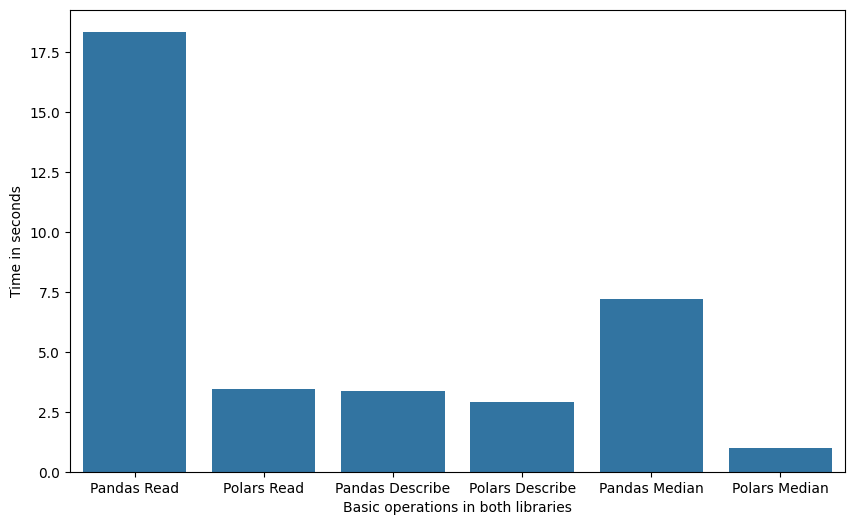

In [59]:
plt.figure(figsize=(10, 6))
plt.xlabel("Basic operations in both libraries")
plt.ylabel("Time in seconds")
sns.barplot(x=x, y=y)

In [61]:
#basic operations comparison
x = ['Pandas Aggregation', 'Polars Aggregation']
y = [pandas_time_groupby, polars_time_groupby]

<Axes: xlabel='Aggregate operations in both libraries', ylabel='Time in seconds'>

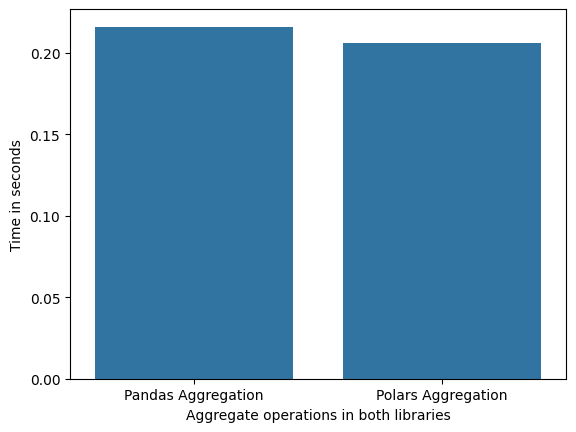

In [63]:
plt.xlabel("Aggregate operations in both libraries")
plt.ylabel("Time in seconds")
sns.barplot(x=x, y=y)

In [64]:
x = ['Polars Eager Evaluation', 'Polars Lazy Evaluation']
y = [eager_evaluation_time, lazy_evaluation_time]

<Axes: xlabel='Eager and Lazy Evaluation in Polars', ylabel='Time in seconds'>

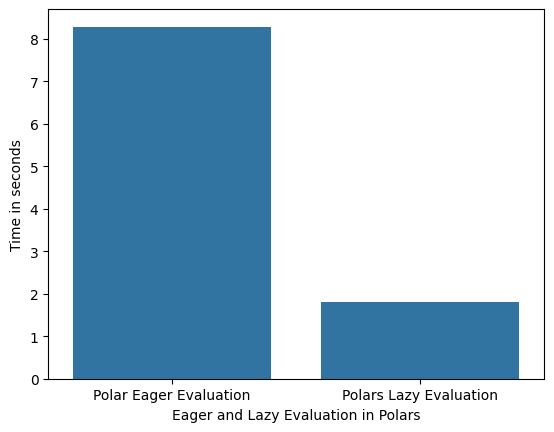

In [65]:
plt.xlabel("Eager and Lazy Evaluation in Polars")
plt.ylabel("Time in seconds")
sns.barplot(x=x, y=y)